# Question

There is a zip file containing the Government-Sponsored Loans.

* Load, clean and export the data to a csv file.
* Analyse the data.

In [73]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Load, Clean and Export Data

In [2]:
# Load data

df = pd.read_csv('data/PPP Data 150k plus 080820.zip')
df.head()

,LoanRange,BusinessName,Address,City,State,Zip,NAICSCode,BusinessType,RaceEthnicity,Gender,Veteran,NonProfit,JobsReported,DateApproved,Lender,CD
0,"d $350,000-1 million",AERO BOX LLC,NaN,NaN,NaN,NaN,484210.0,NaN,Unanswered,Unanswered,Unanswered,NaN,NaN,05/03/2020,The Huntington National Bank,NaN
1,"d $350,000-1 million",BOYER CHILDREN'S CLINIC,1850 BOYER AVE E,SEATTLE,NaN,98112.0,NaN,Non-Profit Organization,Unanswered,Unanswered,Unanswered,Y,75.0,05/03/2020,"Bank of America, National Association",WA-07
2,"d $350,000-1 million",KIRTLEY CONSTRUCTION INC,1661 MARTIN RANCH RD,SAN BERNARDINO,NaN,92407.0,236115.0,Corporation,Unanswered,Unanswered,Unanswered,NaN,21.0,05/03/2020,"Bank of America, National Association",CA-31
3,"d $350,000-1 million","PLEASANT PLACES, INC.",7684 Southrail Road,North Charleston,NaN,29420.0,561730.0,Sole Proprietorship,Unanswered,Male Owned,Non-Veteran,NaN,73.0,05/03/2020,Synovus Bank,SC-01
4,"d $350,000-1 million","SUMTER COATINGS, INC.",2410 Highway 15 South,Sumter,NaN,29150.0,325510.0,Corporation,Unanswered,Unanswered,Unanswered,NaN,62.0,05/03/2020,Synovus Bank,SC-05


In [ ]:
# Check data type

df.info()

In [3]:
# Correct data types

df['Zip'] = df['Zip'].astype('str')
df['NAICSCode'] = df['NAICSCode'].astype('str')
df['DateApproved'] = pd.to_datetime(df['DateApproved'])

In [ ]:
# Profiling

report = ProfileReport(df)
report.to_widgets()

Issues:

1. Duplication
1. Missing values in
* BusinessName
* Address
* City
* State
* Zip
* NAICSode
* BusinessType
* NonProfit
* JobsReported
* CD

Despite the many missing values, key fields like 'LoanRange', 'DateApproved' and 'Lender'.
So no records will be deleted based on the number of missing values.


In [4]:
# Remove duplications

df.drop_duplicates(inplace=True)

In [ ]:
# Check missing data in 'BusinessName'

df[df['BusinessName'].isna()]

In [5]:
# Missing values can be found based on geographic data and matching according to 'NAICSCode' like below

df.loc[235028, 'BusinessName'] = 'American Southwest Electric'
df.loc[235028, 'NonProfit'] = 'N'

# However, this field is not important and can be filled with a constant.

df.fillna({'BusinessName': 'Unknown'}, inplace=True)

In [ ]:
# The most important geographical field is 'State', so check missing data

df[df['State'].isna()]

In [6]:
# Some of them can be filled by using 'CD' field.

df.loc[(df['State'].isna()) & (df['CD'].notna()), 'State'] = df[(df['State'].isna()) & (df['CD'].notna())]['CD'].str[:2]


# and fill the rest misssing values with 'Unknown'

df.fillna({'State': 'Unknown'}, inplace=True)


# Except the 'State' the rest of geograpgical fields seem redundant. In addition 'CD' provides no more data than 'State'.

df.drop(['Address', 'City', 'Zip', 'CD'], axis=1, inplace=True)

In [7]:
# 'NAICSCode' is a 6-digit code, so the format should be corrected and the missing values be filled with 'Unknown'

df.loc[df['NAICSCode'].notna(), 'NAICSCode'] = df.loc[df['NAICSCode'].notna(), 'NAICSCode'].str[:6]

df.fillna({'NAICSCode': 'Unknown'}, inplace=True)

In [ ]:
# Check missing data in 'BusinessType'

df[df['BusinessType'].isna()]

In [8]:
# Missing values in 'BusinessType' can not be filled by using data in another field, so be filled with 'Unknown'

df.fillna({'BusinessType': 'Unknown'}, inplace=True)

In [9]:
# Although there is not any missing values in 'RaceEthnicity', 'Gender' and 'Veteran'. But the most of them (about 80%) are 'Unanswered'. So they seem to be useless.

df.drop(['RaceEthnicity', 'Gender', 'Veteran'], axis=1, inplace=True)

In [10]:
# We can assume that missing values in 'NonProfit' are 'N'.

df.fillna({'NonProfit': 'N'}, inplace=True)

In [11]:
# We can assume that missing values in 'JobsReported' are 0.

df.fillna({'JobsReported': 0}, inplace=True)

In [12]:
# It will be more meaningfull to have shorter lables for 'LoanRange'.

new_labels = {'a $5-10 million': '$5-10 M',
             'b $2-5 million': '$2-5 M',
             'c $1-2 million': '$1-2 M',
             'd $350,000-1 million': '$0.35-1 M',
             'e $150,000-350,000': '$0.15-0.35 M'}
df['LoanRange'].replace(new_labels, inplace=True)

In [ ]:
# Export cleaned values to csv file.

df.to_csv('data/PPP Data 150k plus 080820 (Cleaned).csv', index=False)

# Visualization and Analysis

In [13]:
# let's remove the redundant fields for analysis.
# 'NAICSCode' does not provide valuable information.
# 'DateApproved' are all in 2020 so it is not helpfull.

df.drop(['NAICSCode', 'DateApproved'], axis=1, inplace=True)

In [14]:
# Having a numerical field for 'LoanRange' will be more helpfull. So the average value is added.

new_labels = {'$5-10 M': 7500000,
             '$2-5 M': 3500000,
             '$1-2 M': 1500000,
             '$0.35-1 M': 675000,
             '$0.15-0.35 M': 250000}
df['LoanAverage'] = df['LoanRange'].replace(new_labels)

In [15]:
# Let's define a new field based on 'JobsReported' and 'LoanAverage'.

df['LoanEfficiency'] = df['JobsReported'] * 1000000 / df['LoanAverage']

<AxesSubplot:ylabel='Lender'>

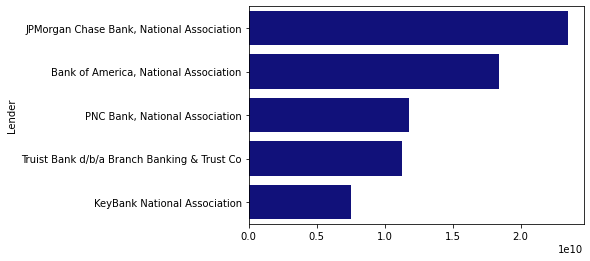

In [16]:
# Let's find the top lenders

aggregated_df = df.groupby('Lender')['LoanAverage'].sum().sort_values(ascending=False).head(5)
sns.barplot(x=aggregated_df.values, y=aggregated_df.index, color='darkblue')

<AxesSubplot:ylabel='BusinessName'>

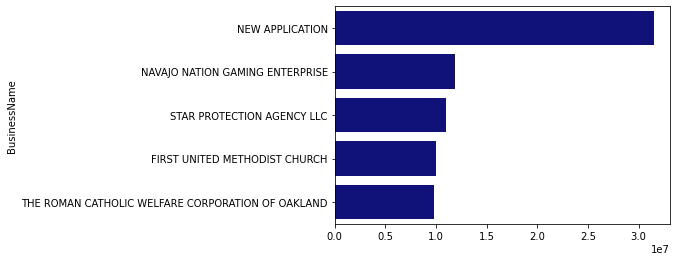

In [17]:
# Let's find the top borrowers

aggregated_df = df.groupby('BusinessName')['LoanAverage'].sum().sort_values(ascending=False).head(5)
sns.barplot(x=aggregated_df.values, y=aggregated_df.index, color='darkblue')

<AxesSubplot:ylabel='BusinessType'>

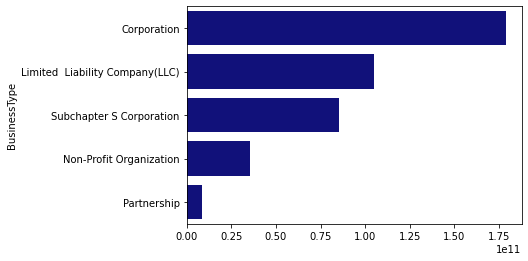

In [18]:
# Let's find the business Types that borrow more

aggregated_df = df.groupby('BusinessType')['LoanAverage'].sum().sort_values(ascending=False).head(5)
sns.barplot(x=aggregated_df.values, y=aggregated_df.index, color='darkblue')

<AxesSubplot:ylabel='BusinessType'>

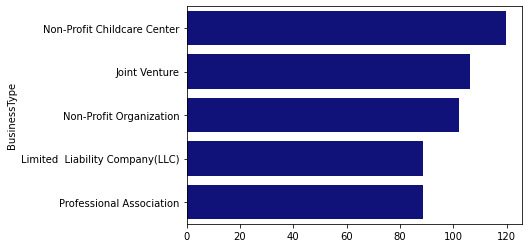

In [19]:
# Let's find the who produces more jobs with the same amount of borrowing

aggregated_df = df.groupby('BusinessType')['LoanEfficiency'].mean().sort_values(ascending=False).head(5)
sns.barplot(x=aggregated_df.values, y=aggregated_df.index, color='darkblue')

<AxesSubplot:xlabel='JobsReported', ylabel='LoanRange'>

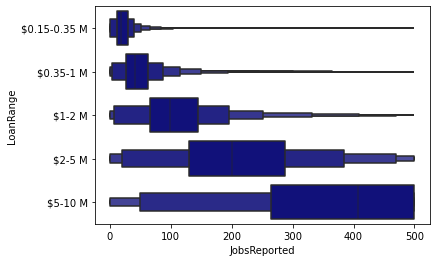

In [20]:
# Let's find which loan category produces more jobs

sns.boxenplot(data=df, x='JobsReported', y='LoanRange',order=df['LoanRange'].value_counts().index, color='darkblue')

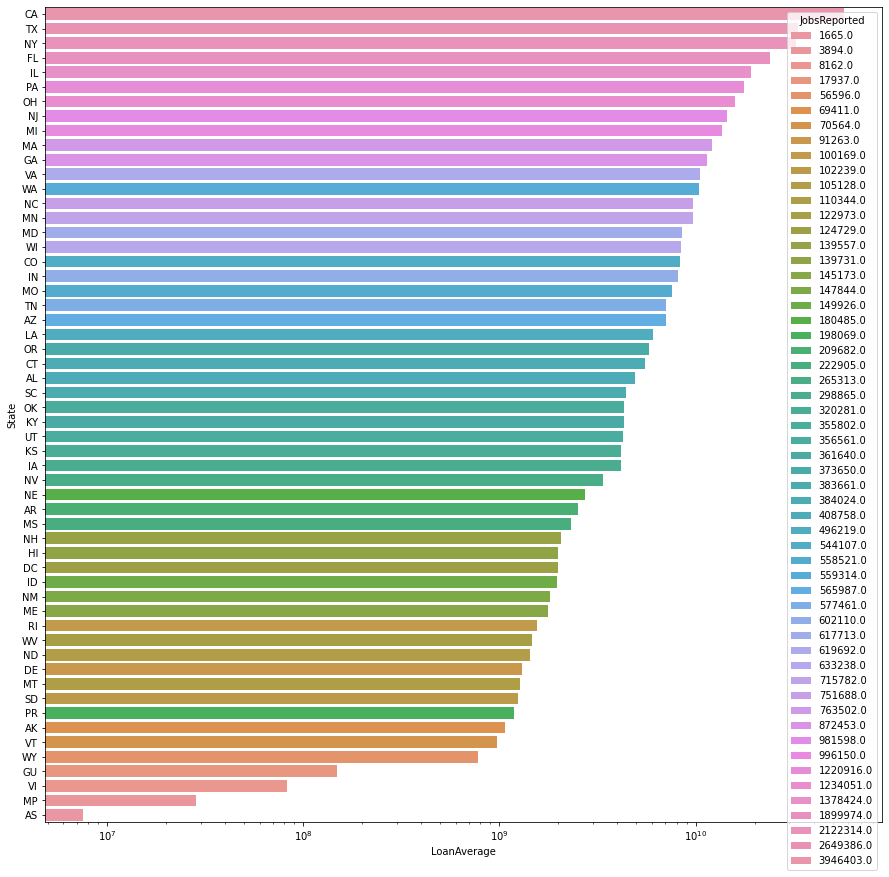

In [79]:
# Let's find the who produces more jobs with the same amount of borrowing

aggregated_df = df.groupby('State').sum()
aggregated_df.drop('LoanEfficiency', axis=1, inplace=True)
aggregated_df.drop('Unknown', axis=0, inplace=True)
aggregated_df.sort_values(by='LoanAverage', ascending=False, inplace=True)
aggregated_df.reset_index(inplace=True)

fig=plt.figure(figsize=(15,15))
ax = sns.barplot(data=aggregated_df, x='LoanAverage', y='State', hue='JobsReported', dodge=False)
plt.xscale('log')